# ***1) Анализ датасета***

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

%matplotlib inline

**Загрузка данных для анализа**

In [3]:
df = pd.read_csv('mushrooms.csv')

In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**Препроцессинг**

In [6]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


**Анализ распределения по признакам**

Данный график построен с помощью библиотеки ``` seaborn``` и отображает распределение признаков из таблицы. 
Можно заметить, что для ```gill-color``` столбца значения делятся как бы на две части, что может поспособствовать классификации данных.

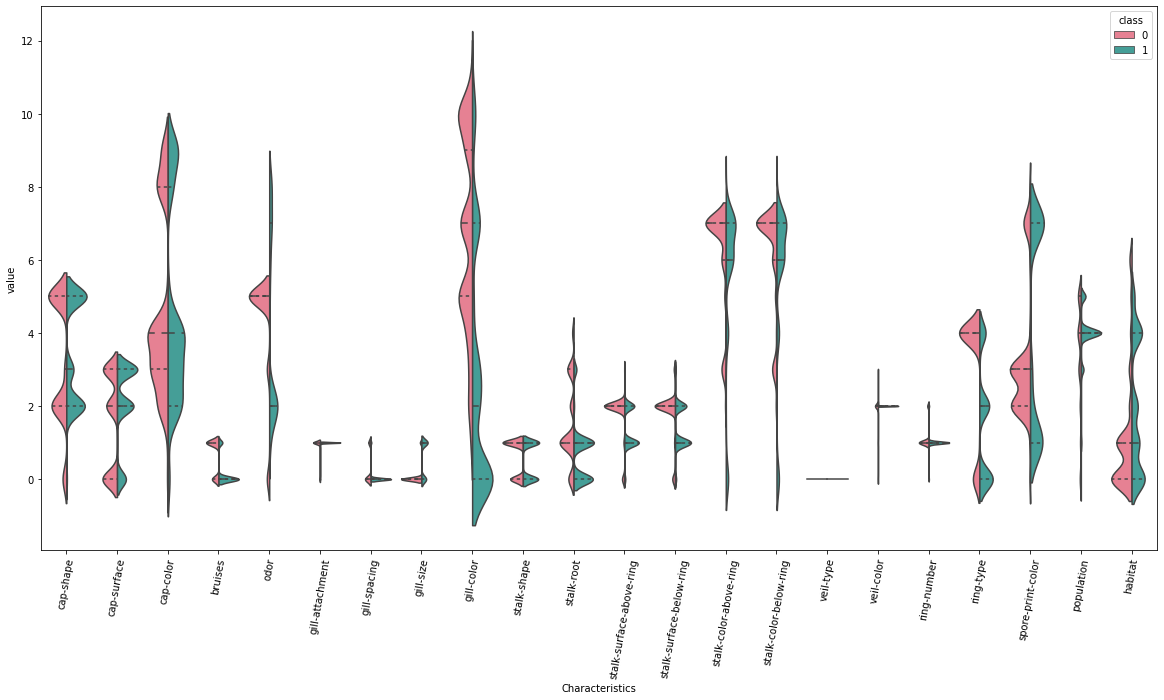

In [8]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(20,10))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'husl')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 80, labels = list(df_no_class.columns));

**Проверка на балансировку данных по классу**

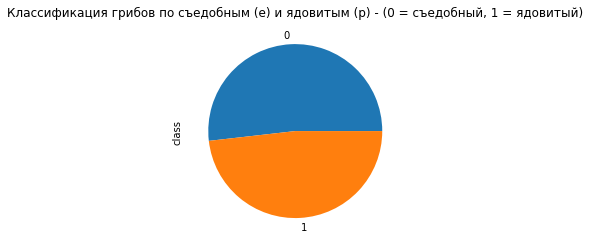

In [9]:
plt.figure()
pd.Series(df['class']).value_counts().sort_index().plot(kind = 'pie')
plt.title('Классификация грибов по съедобным (e) и ядовитым (p) - (0 = съедобный, 1 = ядовитый)');

Из построенной зависимости видно, что класс не нуждается в балансировке.

**Корреляционная матрица значений**

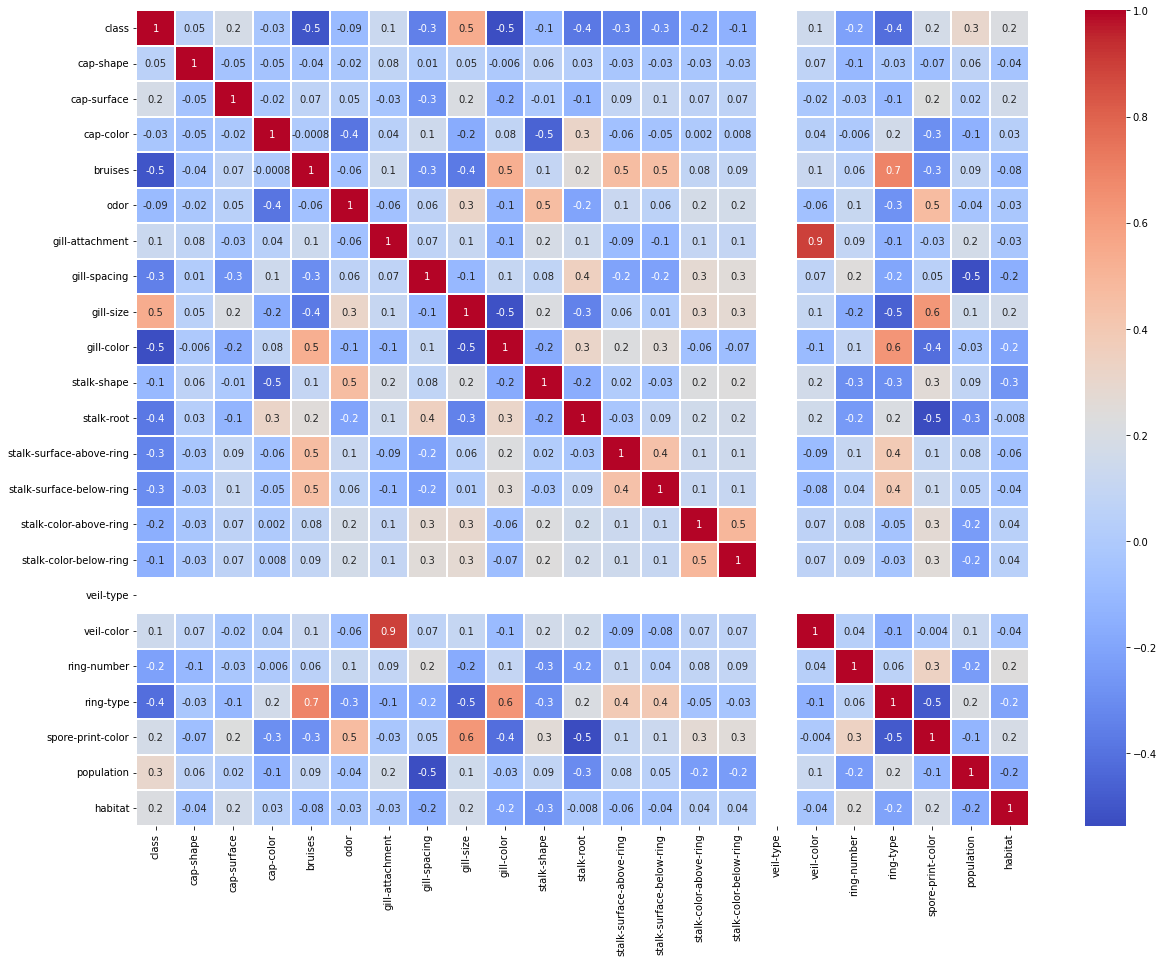

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,cmap="coolwarm", annot=True, fmt='.1g')
plt.yticks(rotation=0);

Рассмотрим значения ```gill-color``` детальнее.

In [11]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


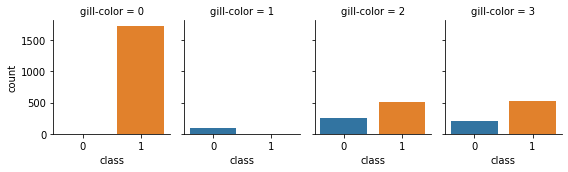

In [12]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

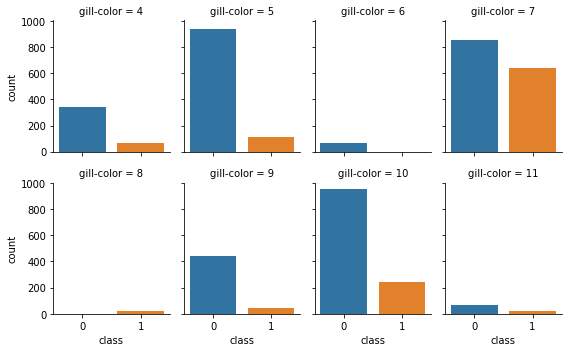

In [13]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]

sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

# ***2) Реализация модели и метрик***

In [14]:
def confusion(ys, ps):
    matrix = np.zeros((2, 2))
    for y, p in zip(ys, ps):
        matrix[1-y, 1-p] += 1

    return matrix

def precision(ys, ps):
    matrix = confusion(ys, ps)
    if matrix[0, 0] + matrix[1, 0] == 0:
        # division by zero means improper classification
        return 0
    return matrix[0, 0] / (matrix[0, 0] + matrix[1, 0])

def recall(ys, ps):
    matrix = confusion(ys, ps)
    if matrix[0, 0] + matrix[0, 1] == 0:
        return 0
    return matrix[0, 0] / (matrix[0, 0] + matrix[0, 1])

In [15]:
class LR():
    def __init__(self, lr=0.01, steps=5000):
        self.lr = lr
        self.steps = steps

    def s(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X_orig = X
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.coefs = np.zeros(X.shape[1])  # weights

        precisions = np.zeros((self.steps))
        recalls    = np.zeros((self.steps))

        for i in range(self.steps):
            pred = self.predict(X_orig)
            
            precisions[i] = precision(y, pred)
            recalls[i]    = recall(y, pred)

            h = self.s(np.dot(X, self.coefs))
            self.coefs -= self.lr * \
                          np.dot(X.T, (h - y)) / y.size  # gradient  step

        return (precisions, recalls)

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return self.s(np.dot(X, self.coefs)).round().astype(int)

# ***3) Обучение модели***

In [16]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [17]:
X = df.drop(['class'], axis=1).to_numpy()
y = df['class'].to_numpy()

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X = ss.fit_transform(X)

In [18]:
def cv(model, X, y, k_folds=5):
    kf = KFold(n_splits=k_folds, random_state=16, shuffle=True)
    scores = np.zeros(k_folds) 
    precisions = np.zeros(k_folds)
    recalls = np.zeros(k_folds)
    for i, (train_index, val_index) in enumerate(kf.split(X, y)):
        X_train, y_train = X[train_index], y[train_index]
        X_val, y_val = X[val_index], y[val_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        precisions[i] = precision(y_val, y_pred)
        recalls[i] = recall(y_val, y_pred)
    return (precisions, recalls)

In [19]:
%%time
model = LogisticRegression()
values = cv(model, X, y)
print("Precision: ", values[0].mean())
print("Recall:    ", values[1].mean())

Precision:  0.9565865299904497
Recall:     0.9514566520050309
CPU times: user 610 ms, sys: 60.8 ms, total: 671 ms
Wall time: 355 ms


In [ ]:
model = LR(steps=5000)
prec, rec = model.fit(X, y)

plt.plot(prec, label="Precision")
plt.plot(rec,  label="Recall")
plt.grid()
plt.legend()

print("Precision: ", prec[-1])
print("Recall:    ", rec[-1])